<br><br>
<font size='6'><b>Statistical Thinking: Monte Carlo Simulation</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungchul Lee<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 1. Illustrative Examples

## 1.1. Example: Probability of having head with a fair coin

Head 1 and Tail 0

In [1]:
numTrials = 100;
numH = 0;
for i = 1:numTrials
    flip = randi([0, 1]);
    if flip == 1
        numH = numH + 1;
    end
end

numH/numTrials

ans =

    0.5400

## 1.2. Example: the expected number of trials upto the first hitting H

$$\text{coin}
\begin{cases}
  H : \frac{1}{2}\\
  T : \frac{1}{2}
\end{cases}
$$

Question: the expected number of trials upto the first hitting H ?

$$\begin{align*}
1 \quad & H & \frac{1}{2}\\
2 \quad & TH & \frac{1}{2} \frac{1}{2}\\
3 \quad & TTH & \frac{1}{2} \frac{1}{2} \frac{1}{2}\\
& \vdots & 
\end{align*}
\quad \quad \quad  \sum\limits_{n=1}^{\infty}n\left(\frac{1}{2}\right)^n
$$

In [2]:
% analytical computation

val = 0;
for n = 1:20
    val = val + n*(1/2)^n;
end
val

val =

    2.0000

In [3]:
% or

numTrials = 1000;
NUM = [];

for k = 1:numTrials
    num = 1;
    while randi([0,1]) ~= 0
        num = num + 1;
    end
    NUM = [NUM num];
end
mean(NUM)

ans =

    2.0170

__Remark:__

how to compute $\sum\limits_{n=1}^{\infty}n\left(\frac{1}{2}\right)^n = 1\frac{1}{2}+2\left(\frac{1}{2}\right)^2+3\left(\frac{1}{2}\right)^3+\cdots$

$$\begin{align*}
\frac{d}{dx}\sum\limits_{n=1}^{\infty}\left(1-x\right)^{n+1} &= \frac{d}{dx}\frac{(1-x)^2}{1-(1-x)} = \frac{d}{dx}\frac{(1-x)^2}{x}\\
\sum\limits_{n=1}^{\infty}(n+1)(1-x)^n &= \sum\limits_{n=1}^{\infty}n(1-x)^n + \sum\limits_{n=1}^{\infty}(1-x)^n\\
& = \frac{(1-x)^2 + 2(1-x)x}{x^2}
\end{align*}$$

$$\begin{align*}
x = \frac{1}{2} &\implies \sum\limits_{n=1}^{\infty}n\left( \frac{1}{2} \right)^n + \frac{1-\frac{1}{2}}{\frac{1}{2}}= \frac{\frac{1}{4} + 2 \cdot \frac{1}{2} \cdot \frac{1}{2}}{\frac{1}{4}}\\
&\implies \sum\limits_{n=1}^{\infty} n\left(\frac{1}{2}\right)^n =2
\end{align*}$$

or

$$\begin{align*}
y &= 1\frac{1}{2} + 2\left( \frac{1}{2} \right)^2 + 3\left(\frac{1}{2} \right)^3 + \cdots&\\
2y &= 1 + 2\left( \frac{1}{2}\right) + 3\left( \frac{1}{2} \right)^2 + \cdots&\\
\implies y &= 1 + \left(\frac{1}{2}\right) + \left( \frac{1}{2} \right)^2 + \cdots &= \frac{1}{1 - \frac{1}{2}} = 2 
\end{align*}$$


## 1.3. Example: Integration

$$
\int_{0}^{1} x^2dx = \frac{1}{2}x^3\bigg|^1_0 = \frac{1}{3}$$

Question : how to solve integration with computers ?


<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st01.png", width = 400>
        </td>
        <td width = 48%>        
            $$
            \begin{align*}
            \Delta A &= f(x) \Delta x \\ \\
            A \approx \sum \Delta A &= \sum f(x_k)\Delta x
            \end{align*}
            $$
        </td>
    </tr>
</table>

In [4]:
% by summing up

dx = 0.001;
x = 0:dx:1;

area = 0;
for i = 1:length(x)
    area = area + x(i)^2*dx;
end

area

area =

    0.3338

In [5]:
% shortened version

sum(x.^2)*dx

ans =

    0.3338

In [6]:
% shortened version

x*x'*dx

ans =

    0.3338

Question: another method ? (use randomness)

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            $$\begin{array}{Icl}\begin{align*}
            x = \text{rand}(n,1)\\
            y = \text{rand}(n,1)
            \end{align*}&
            \implies&
            \text{plot}(x,y)
            \end{array}$$
        </td>
        <td width = 48%>
            <img src = "./image_files/st02.png", width = 250>
        </td>
    </tr>
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st03.png", width = 250>
        </td>
        <td width = 48%>
            $$\frac{\text{# under }y=x^2}{\text{# total}}$$
        </td>
    </tr>
    <tr>
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src = "./image_files/st04.png", width = 250>
        </td>
        <td width = 48%>
            $$\frac{\text{area under }y=x^2 }{\text{total area}}$$
        </td>
    </tr>
</table>

It is known as __Monte Carlo simulation__

$\implies$ extremely powerful

$\implies$ can apply to many, many, many (enginerring) problems

In [7]:
% the number of points below curve out of the total number is a fraction of area

n = 10000;

% generate n random numbers x and y

x = rand(n, 1); % create 1D array with n uniformly distribured random numbers
y = rand(n, 1);

count = 0;
for i = 1:n
    % compute y to f(x)
    if y(i) < x(i)*x(i)
        count = count + 1;
    end
end

% result normalized by total #
area = count/n

area =

    0.3336

In [8]:
% shortened version

area = sum(y < x.^2)/n

area =

    0.3336

## 1.4. Example: compute $\pi$ statistically

In [9]:
n = 5000;
x = rand(n, 1);
y = rand(n, 1);

in = [];
out = [];
count = 0;

for i = 1:n
    if sqrt(x(i)^2+y(i)^2) < 1
        count = count + 1;
        in = [in i];
    else
        out = [out i];
    end
end
(count/n)*4

ans =

    3.1464

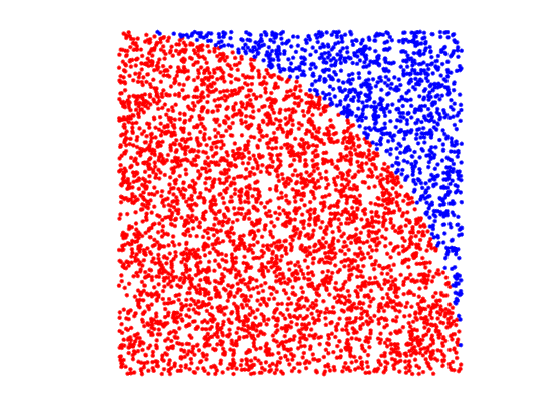

In [10]:
figure(1), clf, hold on
plot(x(in), y(in), 'r.'), axis equal, axis off
plot(x(out), y(out), 'b.'), axis equal, axis off

In [11]:
% shortened version

sum(abs(x + 1j*y) < 1)/n*4

ans =

    3.1464

# 2. Workspace of Robot Arm

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/scara_robot.png", width = 250>
        </td>
        <td width = 48%>
            $$\begin{align*}
                \theta_1, \theta_2&: \text{joint angles of robot (configuration space, joint space)}\\ \\
                l_1,l_2&: \text{length of each link (robot parameters)}\\ \\
                x,y&: \text{position of end effector (task space)}\\ \\               
            \end{align*}
            $$
        </td>
    </tr>
</table>

$\implies$ kinematics is how we move back and forth between these represenations

<img src="./image_files/forward_inverse.png", width = 500>

## 2.1. Forward kinematics of two-link robot

- position of "elbow" $x_0, y_0$

$$
\begin{align*}
x_0 &= l_1 \cos\theta_1\\
y_0 &= l_1 \sin\theta_1\\
\end{align*}
$$

- So, position of end effector $x,y$
$$
\begin{align*}
x &= l_1 \cos\theta_1 + l_2 \cos(\theta_1 + \theta_2)\\
y &= l_1 \sin\theta_1 + l_2 \sin(\theta_1 + \theta_2)\\
\end{align*}
$$

## 2.2. Inverse kinematics of two-link robot

- Given $x,y$, can we find $\theta_1, \theta_2$ that achieve this position ?
     
 $$
\begin{align*}
\theta_2 & = \pm \cos^{-1} \left( \frac{x^2 + y^2 -l_1^2 - l_2^2}{2l_1 l_2} \right) \\
\theta_1 & = \tan^{-1} \left( \frac{y}{x} \right) - \sin^{-1}\left( \frac{l_2 \sin \theta_2}{x^2 + y^2} \right)
\end{align*}
$$
- why does $\theta_2$ have two values?

 (do not worry about the above equations and their derivation)

## 2.3. Reachable space or workspace

the _workspace_ of a manipulator is defined as the set of all end-effector configurations which can be reached by some choice of joint angles. 

- We will use `processing` to visually demonstrate workspace of the end-effector of a SCARA robot

- `Processing` is an open source programming language and integrated development environment (IDE) built for the electronic arts, new media art, and visual design communities with the purpose of teaching the fundamentals of computer programming in a visual context

- `processing` [download and installation](https://processing.org/)

- do not need to undertand the following processing code

In [1]:
%%processing

int L1 = 100;
int L2 = 50;

ArrayList<PVector> ppoints = new ArrayList<PVector>();
ArrayList<PVector> mpoints = new ArrayList<PVector>();
int i = 0;

void setup() {
  size(500, 500);
  background(255);
  calpp();
  smooth();
}

void draw() {
  background(255);
  translate(width/2, height/2);

  if (i >= ppoints.size()) {
    i = 0;
  } else {

    for (int j = 0; j <= i; j++) {
      PVector temp = ppoints.get(j);
      if (abs(i-j) < 100) {
        fill(150, map(abs(i-j), 0, 100, 255, 50));
      } else {
        fill(150, 50);
      }
      noStroke();
      ellipse(temp.x, temp.y, 10, 10);
    }

    PVector p1 = mpoints.get(i);
    PVector p2 = ppoints.get(i);
    stroke(0);
    fill(0);
    ellipse(0, 0,5,5);
    ellipse(p1.x, p1.y,5,5);
    ellipse(p2.x, p2.y, 10, 10);
  
    strokeWeight(5);
    line(p1.x, p1.y, p2.x, p2.y);
    line(0, 0, p1.x, p1.y);

    i++;
  }
}


void calpp() {
  int t1 = 0;
  while (t1 < 360) {

    PVector p1 = new PVector(L1*cos(radians(-t1)), L1*sin(radians(-t1)));
    int t2 = 0;
    while (t2 < 360) {

      PVector p2 = new PVector(L2*cos(radians(-t2)), L2*sin(radians(-t2)));
      ppoints.add(PVector.add(p1, p2));
      mpoints.add(p1);

      t2 = t2+10;
    }
    t1 = t1+15;
  }
}

## 2.4. Workspace of Robot Arm with obsticles
- Obstacles usually “naturally” described in the task space of the robot, but inverse kinematics often makes it less convinient to plan in task space

- Instead, want to determine which poses in the robot’s configuration space (joint space) are non-colliding

- Set of all non-colliding configurations is also called _free space_


<img src="./image_files/robot_obstacle.png", width = 300>

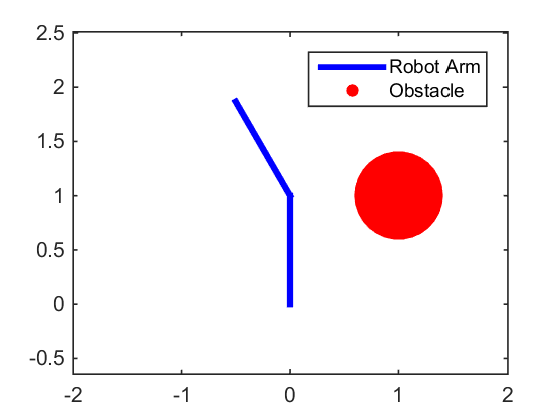

In [13]:
%% Robot Definition - Two linked robot arm

% Initialize parameter
L1 = 1;
L2 = 1;
theta1 = pi/2;
theta2 = pi/6;

% Foward kinematics
origin_x = 0;
origin_y = 0;
joint_x = L1 * cos(theta1);
joint_y = L2 * sin(theta1);
effector_x = L1 * cos(theta1) + L2 * cos(theta1+theta2);
effector_y = L1 * sin(theta1) + L2 * sin(theta1+theta2);

% Obstacle
angle = linspace(0,2*pi,100);
r = 0.4;
x = r*cos(angle) + 1;
y = r*sin(angle) + 1;


%% Visualization

figure(1);hold on; box on
line([origin_x joint_x],[origin_y joint_y],'Color','b','linewidth',3);
h1 = line([joint_x effector_x],[joint_y effector_y],'Color','b','linewidth',3);
% h2 = plot(x,y,'.r');
h2 = scatter(1,1,1800,'filled','markerfacecolor','r');
legend([h1,h2],'Robot Arm','Obstacle');
xlim([-2 2]);ylim([0 2])
axis equal

## 2.5. Estimating robot workspace with Monte Carlo simulation

- In general, it’s very difficult to analytically desribe the free space


- But we can (relatively) quickly check to see if a given configuration is colliding or not


- Suppose the collision occurs between the robot and the obstacle if any part of the robot arm contacts or penetrates an obstacle


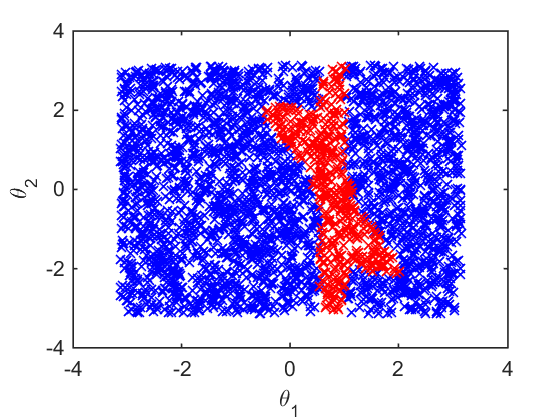

In [14]:
% Robot parameters
L1 = 1;
L2 = 1;
r = 0.5;
% r = 0.4;

% The number of random points
m = 3000;

b = pi;
a = -pi;
theta1 = (b-a)*rand(m,1) + a;
theta2 = (b-a)*rand(m,1) + a;

effector_x = L1*cos(theta1) + L2*cos(theta1 + theta2);
effector_y = L1*sin(theta1) + L2*sin(theta1 + theta2);
joint_x = L1*cos(theta1);
joint_y = L2*sin(theta1);

%% check collision

S = [];
U = [];

for i = 1:m
    g1 = joint_y(i)/joint_x(i);
    g2 = (effector_y(i) - joint_y(i))/(effector_x(i) - joint_x(i));
    v2 = (joint_y(i)*effector_x(i) - effector_y(i)*joint_x(i))/(effector_x(i) - joint_x(i));
    
    tempx1 = linspace(0,joint_x(i),5);
    tempx2 = linspace(joint_x(i),effector_x(i),5);

    S = [S; [theta1(i),theta2(i)]];
    
    for j = 1:5 
        if (tempx1(j)-1)^2 + (g1*tempx1(j)-1)^2 <= r^2 ||...
                (tempx2(j) - 1)^2 + (g2*tempx2(j) + v2 - 1)^2 <= r^2
                
            U = [U; [theta1(i),theta2(i)]];
            break;        
        end
    end
    
end

figure(1),  clf
plot(S(:,1),S(:,2),'bx'),   hold on
plot(U(:,1),U(:,2),'rx'),   hold off
xlabel('\theta_1'), ylabel('\theta_2')

# 3. Probablistic RoadMaps (PRM) for robot path planning (Optional)

- a motion planning algorithm in robotics, which solves the problem of determining a path between a starting configuration of the robot and a goal configuration while avoiding collisions.


- The basic idea behind PRM is 
    1. to take _random samples_ from the configuration space of the robot, 
    2. testing them for whether they are in the free space, and 
    3. use a local planner to attempt to connect these configurations to other nearby configurations.
    4. remove all colliding paths (collision-free)
    5. The starting and goal configurations are added in, and 
    6. a _graph search algorithm_ is applied to the resulting graph to determine a path between the starting and goal configurations.


- reference: [Probabilistic roadmaps for path planning in high-dimensional configuration spaces](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=508439&tag=1)

- Read <a href="./reference_files/PRMs_robotics.pdf" target="_blank">PRMs robotics.pdf</a>

## MATLAB Simulation

The MATLAB Robot library is needed (download from http://petercorke.com/Robotics_Toolbox.html)

```octave
load map.mat% load map
goal = [50,30]; % goal point
start = [20, 10]; % start point
prm = PRM(map); % create navigation object

%%
prm.plan() % create roadmaps

%%
prm.path(start, goal) % animate path from this start location
```

<img src='./image_files/PRM.png'>

# 4. Statistical Mechanics and Computations (Optional)

- Discrete event simulation or Molecular dynamics (MD) is a computer simulation method for studying the physical movements of atoms and molecules, and is thus a type of N-body simulation. The atoms and molecules are allowed to interact for a fixed period of time, giving a view of the dynamical evolution of the system. 


- the following `precessing` example demonstrates the famous hard disk model

<img src="./image_files/harddisk.png", width = 600>


- We can use this MD simulation model to statistically justify the equation of ideal gas, $PV = nRT$

    - http://quantumfreak.com/derivation-of-pvnrt-the-equation-of-ideal-gas/


- source: chapter 2 at http://www.smac.lps.ens.fr/index.php/Contents

In [2]:
%%processing

// run it in processing

int m = 20; // mass
int n = 4; // number of balls
int v = 10; // maximum velocity

//---------------------------------

Ball[] balls = new Ball[n];

void setup() {
  size(640, 360);

  int f = 1;

  while (f == 1) {
    f = 0;

    for (int i = 0; i < balls.length; i++) {
      balls[i] = new Ball(m);
    }

    for (int i = 0; i < balls.length; i++) {
      for (int j = 0; j <balls.length; j++) {
        if (i != j) {

          PVector bVect = PVector.sub(balls[i].position, balls[j].position);

          float bVectMag = bVect.mag();

          if (bVectMag < (balls[i].r + balls[j].r + 5)) {
            f = 1;
          }
        }
      }
    }
  }
}

void draw() {
  background(51);

  for (Ball b : balls) {
    b.update();
    b.display();
    b.checkBoundaryCollision();
  }

  for (int i = 0; i < balls.length; i++) {
    for (int j = 0; j <balls.length; j++) {
      if (i != j) {
        balls[i].checkCollision(balls[j], i, j);
      }
    }
  }
}


class Ball {
  PVector position;
  PVector velocity;
  float r, m;
  int[] flag = new int[n];

  Ball(float r_) {
    position = new PVector(random(width), random(height));
    velocity = new PVector(random(-v, v), random(-v, v));

    r = r_;
    m = r;
    for (int i = 0; i < n; i++) {
      flag[i] = 0;
    }
  }

  void update() {
    position.add(velocity);
  }

  void checkBoundaryCollision() {
    if (position.x > width-r) {
      position.x = width-r;
      velocity.x *= -1;
    } else if (position.x < r) {
      position.x = r;
      velocity.x *= -1;
    } else if (position.y > height-r) {
      position.y = height-r;
      velocity.y *= -1;
    } else if (position.y < r) {
      position.y = r;
      velocity.y *= -1;
    }
  }

  void checkCollision(Ball other, int k1, int k2) {

    // get distances between the balls components
    PVector bVect = PVector.sub(other.position, position);

    // calculate magnitude of the vector separating the balls
    float bVectMag = bVect.mag();

    if (bVectMag < (r + other.r) && flag[k2] != 1) {
      flag[k2] = 1;
      other.flag[k1] = 1;

      // get angle of bVect
      float theta  = bVect.heading();
      // precalculate trig values
      float sine = sin(theta);
      float cosine = cos(theta);

      /* bTemp will hold rotated ball positions. You 
       just need to worry about bTemp[1] position*/
      PVector[] bTemp = {
        new PVector(), new PVector()
        };

        /* this ball's position is relative to the other
         so you can use the vector between them (bVect) as the 
         reference point in the rotation expressions.
         bTemp[0].position.x and bTemp[0].position.y will initialize
         automatically to 0.0, which is what you want
         since b[1] will rotate around b[0] */
      bTemp[1].x  = cosine * bVect.x + sine * bVect.y;
      bTemp[1].y  = cosine * bVect.y - sine * bVect.x;

      // rotate Temporary velocities
      PVector[] vTemp = {
        new PVector(), new PVector()
        };

      vTemp[0].x  = cosine * velocity.x + sine * velocity.y;
      vTemp[0].y  = cosine * velocity.y - sine * velocity.x;
      vTemp[1].x  = cosine * other.velocity.x + sine * other.velocity.y;
      vTemp[1].y  = cosine * other.velocity.y - sine * other.velocity.x;

      /* Now that velocities are rotated, you can use 1D
       conservation of momentum equations to calculate 
       the final velocity along the x-axis. */
      PVector[] vFinal = {  
        new PVector(), new PVector()
        };

        // final rotated velocity for b[0]
      vFinal[0].x = ((m - other.m) * vTemp[0].x + 2 * other.m * vTemp[1].x) / (m + other.m);
      vFinal[0].y = vTemp[0].y;

      // final rotated velocity for b[0]
      vFinal[1].x = ((other.m - m) * vTemp[1].x + 2 * m * vTemp[0].x) / (m + other.m);
      vFinal[1].y = vTemp[1].y;

      // hack to avoid clumping
      bTemp[0].x += vFinal[0].x;
      bTemp[1].x += vFinal[1].x;

      /* Rotate ball positions and velocities back
       Reverse signs in trig expressions to rotate 
       in the opposite direction */
      // rotate balls
      PVector[] bFinal = { 
        new PVector(), new PVector()
        };

      bFinal[0].x = cosine * bTemp[0].x - sine * bTemp[0].y;
      bFinal[0].y = cosine * bTemp[0].y + sine * bTemp[0].x;
      bFinal[1].x = cosine * bTemp[1].x - sine * bTemp[1].y;
      bFinal[1].y = cosine * bTemp[1].y + sine * bTemp[1].x;

      // update balls to screen position
      other.position.x = position.x + bFinal[1].x;
      other.position.y = position.y + bFinal[1].y;

      position.add(bFinal[0]);

      // update velocities
      velocity.x = cosine * vFinal[0].x - sine * vFinal[0].y;
      velocity.y = cosine * vFinal[0].y + sine * vFinal[0].x;
      other.velocity.x = cosine * vFinal[1].x - sine * vFinal[1].y;
      other.velocity.y = cosine * vFinal[1].y + sine * vFinal[1].x;
    } else {
      flag[k2] = 0;
    }
  }

  void display() {
    noStroke();
    fill(204);
    ellipse(position.x, position.y, r*2, r*2);
  }
}

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>